# YOLOv5 Classification Tutorial

YOLOv5 supports classification tasks too. This is the official YOLOv5 classification notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 classification on ImageNet
*  [Training YOLOv5 classification](https://blog.roboflow.com//train-YOLOv5-classification-custom-data) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1FiSNz9f_nT8aFtDEU3iDAQKlPT8SCVni?usp=sharing) to run it.

# Setup

Pull in respective libraries to prepare the notebook environment.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/166.8 GB disk)


# 1. Infer on ImageNet

To demonstrate YOLOv5 classification, we'll leverage an already trained model. In this case, we'll download the ImageNet trained models pretrained on ImageNet using YOLOv5 Utils.

In [2]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

100%|██████████| 4.87M/4.87M [00:00<00:00, 70.9MB/s]

100%|██████████| 10.5M/10.5M [00:00<00:00, 72.4MB/s]

100%|██████████| 24.9M/24.9M [00:00<00:00, 71.2MB/s]

100%|██████████| 50.9M/50.9M [00:00<00:00, 62.5MB/s]

100%|██████████| 92.0M/92.0M [00:01<00:00, 70.5MB/s]



Now, we can infer on an example image from the ImageNet dataset.

In [3]:
#Download example image
import requests
image_url = "https://i.imgur.com/OczPfaz.jpg"
img_data = requests.get(image_url).content
with open('bananas.jpg', 'wb') as handler:
    handler.write(img_data)

In [4]:
#Infer using classify/predict.py
!python classify/predict.py --weights ./weigths/yolov5s-cls.pt --source bananas.jpg

classify/predict: weights=['./weigths/yolov5s-cls.pt'], source=bananas.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 10.5M/10.5M [00:00<00:00, 183MB/s]

Fusing layers... 
Model summary: 117 layers, 5447688 parameters, 0 gradients, 11.4 GFLOPs
image 1/1 /content/yolov5/bananas.jpg: 224x224 banana 0.96, zucchini 0.00, acorn squash 0.00, spaghetti squash 0.00, green mamba 0.00, 2.7ms
Speed: 0.3ms pre-process, 2.7ms inference, 33.0ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp


From the output, we can see the ImageNet trained model correctly predicts the class `banana` with `0.95` confidence.

## 2. (Optional) Validate

Use the `classify/val.py` script to run validation for the model. This will show us the model's performance on each class.

First, we need to download ImageNet.

In [ ]:
# # WARNING: takes ~20 minutes
# !bash data/scripts/get_imagenet.sh --val

In [ ]:
# # run the validation script
# !python classify/val.py --weights ./weigths/yolov5s-cls.pt --data ../datasets/imagenet

The output shows accuracy metrics for the ImageNet validation dataset including per class accuracy.

# 3. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package. 

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 classification on custom data](https://blog.roboflow.com/train-YOLOv5-classification-custom-data).)


Create a free Roboflow account, upload your data, and label. 

![](https://s4.gifyu.com/images/fruit-labeling.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 classification to load into this notebook. Select the `Export` button at the top of the version page, `Folder Structure` type, and `show download code`.

The ensures all our directories are in the right format:

```
dataset
├── train
│   ├── class-one
│   │   ├── IMG_123.jpg
│   └── class-two
│       ├── IMG_456.jpg
├── valid
│   ├── class-one
│   │   ├── IMG_789.jpg
│   └── class-two
│       ├── IMG_101.jpg
├── test
│   ├── class-one
│   │   ├── IMG_121.jpg
│   └── class-two
│       ├── IMG_341.jpg
```

![](https://i.imgur.com/BF9BNR8.gif)


Copy and paste that snippet into the cell below.

In [5]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [ ]:
# REPLACE the below with your exported code snippet from above
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY")
project = rf.workspace("yolov5-classification").project("banana-ripeness-classification")
dataset = project.version(1).download("folder")

In [12]:
#Save the dataset name to the environment so we can use it in a system call later
#dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = 'datasets'

NameError: ignored

### Train On Custom Data 🎉
Here, we use the DATASET_NAME environment variable to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training. 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
! unzip '/content/drive/MyDrive/omdena_liverpool_all/C-NMC_Leukemia/training_data/new_all_hem_crop'

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: new_hem_crop/aug__278_6058.bmp  
  inflating: new_hem_crop/aug__2780_9567.bmp  
  inflating: new_hem_crop/aug__2781_8552.bmp  
  inflating: new_hem_crop/aug__2782_4329.bmp  
  inflating: new_hem_crop/aug__2783_8894.bmp  
  inflating: new_hem_crop/aug__2784_9120.bmp  
  inflating: new_hem_crop/aug__2784_9703.bmp  
  inflating: new_hem_crop/aug__2785_476.bmp  
  inflating: new_hem_crop/aug__2786_5975.bmp  
  inflating: new_hem_crop/aug__2787_1010.bmp  
  inflating: new_hem_crop/aug__2788_1541.bmp  
  inflating: new_hem_crop/aug__2789_7227.bmp  
  inflating: new_hem_crop/aug__279_2826.bmp  
  inflating: new_hem_crop/aug__2790_1239.bmp  
  inflating: new_hem_crop/aug__2791_5896.bmp  
  inflating: new_hem_crop/aug__2792_8352.bmp  
  inflating: new_hem_crop/aug__2793_5034.bmp  
  inflating: new_hem_crop/aug__2794_7822.bmp  
  inflating: new_hem_crop/aug__2794_9885.bmp  
  inflating: new_hem_crop/aug__2795_5970.bmp  
  in

In [8]:
!mkdir data
!mkdir data/class_data
!mv new_hem_crop  ./data/class_data/hem
!mv new_all_crop ./data/class_data/all


In [9]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import splitfolders

In [11]:
splitfolders.ratio(
    "./data/class_data/", 
    output="./datasets/", 
    seed=21, 
    ratio=(0.8, 0.1, 0.1), 
    group_prefix=None
)

Copying files: 14562 files [00:03, 4015.70 files/s]


In [19]:
!mv /content/datasets/datasets/valid /content/datasets/datasets/val

In [14]:
os.environ["DATASET_NAME"] = '/content/datasets/datasets'

In [42]:
%cd /content/yolov5
!python classify/train.py --model yolov5s-cls.pt --data $DATASET_NAME --epochs 100 --img 128 --pretrained weights/yolov5s-cls.pt

/content/yolov5
2023-04-06 17:05:27.830817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 17:05:28.774175: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
classify/train: model=yolov5s-cls.pt, data=/content/datasets/datasets, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

TensorBoard: Start with 'tensor

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [26]:
!mv /content/datasets/datasets/val /content/datasets/datasets/val_

In [27]:
!mv /content/datasets/datasets/test /content/datasets/datasets/val

In [21]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data $DATASET_NAME

classify/val: data=/content/datasets/datasets, weights=['runs/train-cls/exp/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
testing: 100% 12/12 [00:02<00:00,  5.16it/s]
                   Class      Images    top1_acc    top5_acc
                     all        1457       0.916           1
                     all         728       0.944           1
                     hem         729       0.888           1
Speed: 0.1ms pre-process, 0.7ms inference, 0.0ms post-process per image at shape (1, 3, 224, 224)
Results saved to runs/val-cls/exp3


### Infer With Your Custom Model

In [23]:
#Get the path of an image from the test or validation set
if os.path.exists(os.path.join('/content/datasets/datasets/', "test")):
  split_path = os.path.join('/content/datasets/datasets/', "test")
else:
  os.path.join('/content/datasets/datasets/', "val")
example_class = os.listdir(split_path)[0]
example_image_name = os.listdir(os.path.join(split_path, example_class))[0]
example_image_path = os.path.join(split_path, example_class, example_image_name)
os.environ["TEST_IMAGE_PATH"] = example_image_path

print(f"Inferring on an example of the class '{example_class}'")

#Infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source $TEST_IMAGE_PATH

Inferring on an example of the class 'hem'
classify/predict: weights=['runs/train-cls/exp/weights/best.pt'], source=/content/datasets/datasets/test/hem/UID_H22_3_4_hem.bmp, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
image 1/1 /content/datasets/datasets/test/hem/UID_H22_3_4_hem.bmp: 224x224 hem 0.82, all 0.18, 3.3ms
Speed: 0.4ms pre-process, 3.3ms inference, 7.6ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp2


We can see the inference results show ~3ms inference and the respective classes predicted probabilities.

In [28]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data $DATASET_NAME

classify/val: data=/content/datasets/datasets, weights=['runs/train-cls/exp/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
validating: 100% 12/12 [00:02<00:00,  5.09it/s]
                   Class      Images    top1_acc    top5_acc
                     all        1457       0.916           1
                     all         728       0.944           1
                     hem         729       0.888           1
Speed: 0.1ms pre-process, 0.8ms inference, 0.0ms post-process per image at shape (1, 3, 224, 224)
Results saved to runs/val-cls/exp6


In [33]:
os.listdir('/content/datasets/datasets/val/hem/')

['UID_H22_3_4_hem.bmp',
 'aug__482_7579.bmp',
 'UID_H8_1_4_hem.bmp',
 'aug__2932_1372.bmp',
 'UID_H2_37_1_hem.bmp',
 'aug__510_6094.bmp',
 'aug__220_3463.bmp',
 'aug__2671_8895.bmp',
 'UID_H13_13_4_hem.bmp',
 'aug__2327_5615.bmp',
 'aug__3100_8565.bmp',
 'aug__2233_7090.bmp',
 'aug__1681_8070.bmp',
 'UID_H14_32_5_hem.bmp',
 'UID_H24_32_6_hem.bmp',
 'aug__965_2109.bmp',
 'aug__2122_4321.bmp',
 'UID_H20_2_5_hem.bmp',
 'aug__1037_2195.bmp',
 'aug__229_4377.bmp',
 'UID_H22_28_3_hem.bmp',
 'UID_H24_16_11_hem.bmp',
 'UID_H18_7_1_hem.bmp',
 'UID_H18_6_1_hem.bmp',
 'UID_H8_5_1_hem.bmp',
 'aug__2606_2749.bmp',
 'UID_H9_5_1_hem.bmp',
 'aug__1866_1209.bmp',
 'aug__1648_3187.bmp',
 'UID_H22_6_4_hem.bmp',
 'UID_H24_22_9_hem.bmp',
 'UID_H14_27_1_hem.bmp',
 'aug__3222_8488.bmp',
 'aug__1718_8220.bmp',
 'aug__820_3102.bmp',
 'UID_H20_7_1_hem.bmp',
 'UID_H23_19_14_hem.bmp',
 'aug__1520_1685.bmp',
 'UID_H2_10_4_hem.bmp',
 'UID_H40_19_8_hem.bmp',
 'aug__770_5007.bmp',
 'aug__1483_3077.bmp',
 'aug__2749_2

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
# # Upload example image
# project.upload(image_path)


In [ ]:
# # Example upload code 
# min_conf = float("inf")
# for pred in results:
#     if pred["score"] < min_conf:
#         min_conf = pred["score"]
# if min_conf < 0.4:
#     project.upload(image_path)

# (BONUS) YOLOv5 classify/predict.py Accepts Several Input Methods
- Webcam: `python classify/predict.py --weights yolov5s-cls.pt --source 0`
- Image `python classify/predict.py --weights yolov5s-cls.pt --source img.jpg`
- Video: `python classify/predict.py --weights yolov5s-cls.pt --source vid.mp4`
- Directory: `python classify/predict.py --weights yolov5s-cls.pt --source path/`
- Glob: `python classify/predict.py --weights yolov5s-cls.pt --source 'path/*.jpg'`
- YouTube: `python classify/predict.py --weights yolov5s-cls.pt --source 'https://youtu.be/Zgi9g1ksQHc'`
- RTSP, RTMP, HTTP stream: `python classify/predict.py --weights yolov5s-cls.pt --source 'rtsp://example.com/media.mp4'`

###Directory Example

In [ ]:
#Directory infer
os.environ["TEST_CLASS_PATH"] = test_class_path = os.path.join(*os.environ["TEST_IMAGE_PATH"].split(os.sep)[:-1])
print(f"Infering on all images from the directory {os.environ['TEST_CLASS_PATH']}")
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /$TEST_CLASS_PATH/

###YouTube Example

In [ ]:
#YouTube infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source 'https://www.youtube.com/watch?v=7AlYA4ItA74'

In [43]:
!python classify/predict.py --weights runs/train-cls/exp4/weights/best.pt --visualize  --save-txt --source '/content/datasets/datasets/test_/hem/'  

classify/predict: weights=['runs/train-cls/exp4/weights/best.pt'], source=/content/datasets/datasets/test_/hem/, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=True, nosave=False, augment=False, visualize=True, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
image 1/729 /content/datasets/datasets/test_/hem/UID_H10_105_4_hem.bmp: 224x224 hem 0.89, all 0.11, 2.7ms
image 2/729 /content/datasets/datasets/test_/hem/UID_H10_106_1_hem.bmp: 224x224 all 0.54, hem 0.46, 2.9ms
image 3/729 /content/datasets/datasets/test_/hem/UID_H10_107_2_hem.bmp: 224x224 hem 0.83, all 0.17, 2.9ms
image 4/729 /content/datasets/datasets/test_/hem/UID_H10_117_3_hem.bmp: 224x224 hem 0.65, all 0.35, 2.7ms
image 5/729 /content/datasets/datasets/test_/hem/UID_H10

In [44]:
!python classify/predict.py --weights runs/train-cls/exp4/weights/best.pt --visualize  --save-txt --source '/content/datasets/datasets/test_/all/'

classify/predict: weights=['runs/train-cls/exp4/weights/best.pt'], source=/content/datasets/datasets/test_/all/, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=True, nosave=False, augment=False, visualize=True, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-134-g23c4923 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 117 layers, 4169250 parameters, 0 gradients, 10.4 GFLOPs
image 1/728 /content/datasets/datasets/test_/all/UID_11_21_2_all.bmp: 224x224 all 0.70, hem 0.30, 3.8ms
image 2/728 /content/datasets/datasets/test_/all/UID_11_21_3_all.bmp: 224x224 all 0.57, hem 0.43, 3.0ms
image 3/728 /content/datasets/datasets/test_/all/UID_11_22_2_all.bmp: 224x224 hem 0.51, all 0.49, 2.8ms
image 4/728 /content/datasets/datasets/test_/all/UID_11_31_3_all.bmp: 224x224 all 0.52, hem 0.48, 2.7ms
image 5/728 /content/datasets/datasets/test_/all/UID_11_33_2_all

In [45]:
import pandas as pd
import numpy as np

In [65]:
with open('/content/yolov5/runs/predict-cls/exp7/labels/UID_H10_105_4_hem.txt') as f:
    lines = f.readlines()
(lines[0].split(' ')[1]).split('\n')[0]

'hem'

In [69]:
df_pred = pd.DataFrame()

In [72]:
path = '/content/yolov5/runs/predict-cls/exp8/labels/'
true_label = 'all' #
for file in os.listdir(path):
    with open(path + file) as f:
        lines = f.readlines()
    line1_val = float(lines[0].split(' ')[0])
    line1_lab = (lines[0].split(' ')[1]).split('\n')[0]
    line2_val = float(lines[1].split(' ')[0])
    line2_lab = (lines[1].split(' ')[1]).split('\n')[0]   
    #print(f'{file}: {line1_lab} {line1_val}  {line2_lab}  {line2_val}') 

    df_pred = pd.concat(
        [df_pred, 
         pd.DataFrame({'file': file, 
                       'true_label' : true_label, 
                       'pred_label' : line1_lab, 
                       'prob': line1_val},index=[0])],
                       axis=0) 

In [73]:
df_pred.tail()

,file,true_label,pred_label,prob
0,UID_52_23_12_all.txt,all,all,0.74
0,UID_67_4_5_all.txt,all,all,0.73
0,UID_26_6_9_all.txt,all,all,0.58
0,UID_51_127_4_all.txt,all,all,0.68
0,UID_68_37_2_all.txt,all,all,0.70


In [74]:
df_pred.shape

(1457, 4)

In [75]:
df_pred['true_label_int'] = df_pred['true_label'].apply(lambda x: 0 if x=='hem' else 1)
df_pred['pred_label_int'] = df_pred['pred_label'].apply(lambda x: 0 if x=='hem' else 1)

In [76]:
df_pred.head()

,file,true_label,pred_label,prob,true_label_int,pred_label_int
0,aug__1487_4434.txt,hem,hem,0.95,0,0
0,aug__749_808.txt,hem,hem,0.95,0,0
0,UID_H2_10_4_hem.txt,hem,hem,0.88,0,0
0,aug__2327_5615.txt,hem,hem,0.94,0,0
0,aug__1451_3722.txt,hem,hem,0.95,0,0


In [77]:
df_pred.tail()

,file,true_label,pred_label,prob,true_label_int,pred_label_int
0,UID_52_23_12_all.txt,all,all,0.74,1,1
0,UID_67_4_5_all.txt,all,all,0.73,1,1
0,UID_26_6_9_all.txt,all,all,0.58,1,1
0,UID_51_127_4_all.txt,all,all,0.68,1,1
0,UID_68_37_2_all.txt,all,all,0.70,1,1


In [84]:
from sklearn.metrics import classification_report
print(classification_report(df_pred['true_label_int'], df_pred['pred_label_int'], target_names = ['hem','all']))

              precision    recall  f1-score   support

         hem       0.94      0.89      0.91       729
         all       0.89      0.94      0.92       728

    accuracy                           0.91      1457
   macro avg       0.92      0.91      0.91      1457
weighted avg       0.92      0.91      0.91      1457



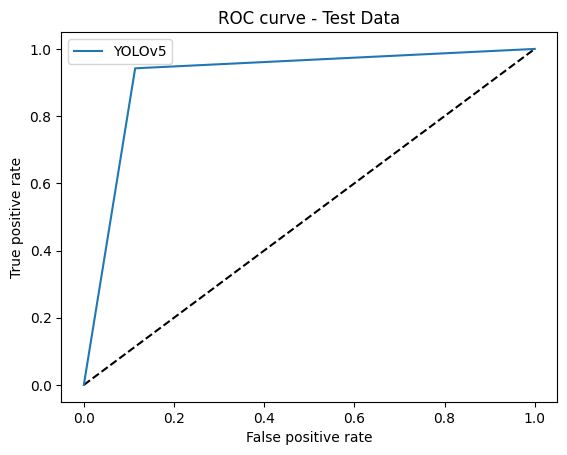

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr_rf, tpr_rf, _ = roc_curve(df_pred['true_label_int'], df_pred['pred_label_int'])

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='YOLOv5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Test Data')
plt.legend(loc='best')
plt.show()

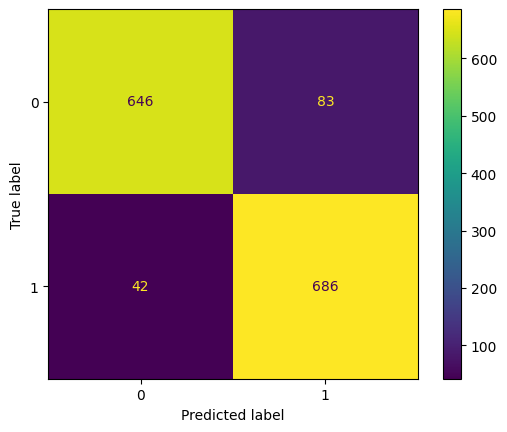

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(df_pred['true_label_int'], df_pred['pred_label_int'])

import seaborn as sns
%matplotlib inline  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()